In [ ]:
!sudo apt-get install -y fonts-nanum

! sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

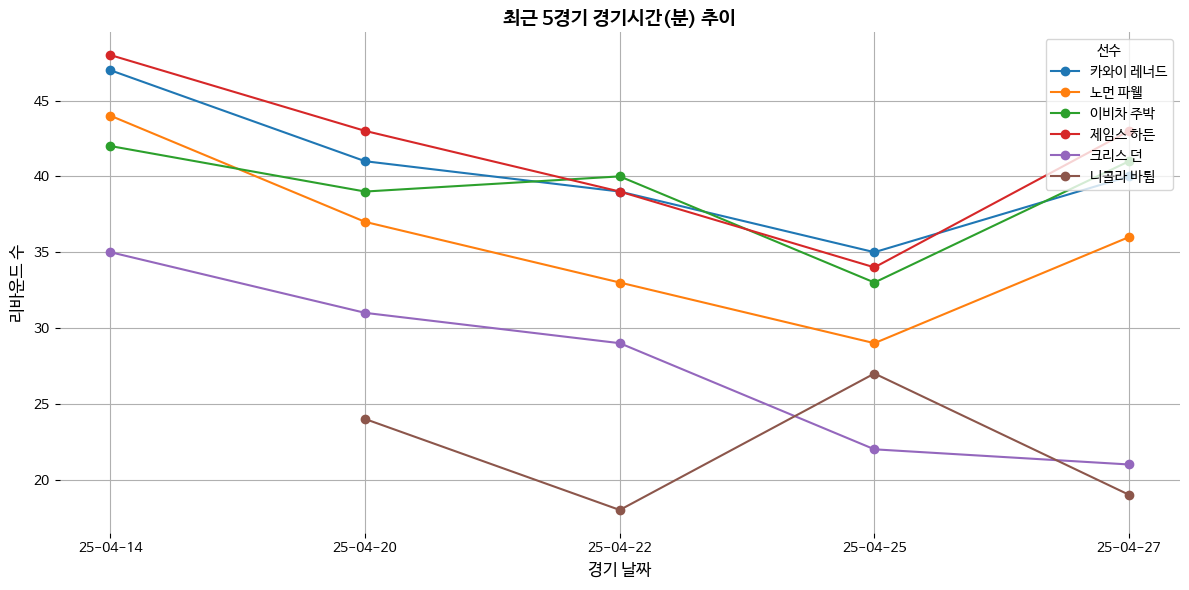

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df = pd.read_csv("/content/최근경기 요약.csv")

# 사용할 열
time_columns = ['경기시간(분)1', '경기시간(분)2', '경기시간(분)3', '경기시간(분)4', '경기시간(분)5']
x_labels = ['25-04-14', '25-04-20', '25-04-22', '25-04-25', '25-04-27']

# 상위 6명 선수만 선택
selected_df = df[['선수명'] + time_columns].head(6)
selected_df['선수명'] = selected_df['선수명'].str.split('·').str[0].str.strip()

# 그래프 그리기
plt.figure(figsize=(12, 6))
for i, row in selected_df.iterrows():
    player_name = row['선수명']
    y_values = row[1:]
    plt.plot(x_labels, y_values, marker='o', label=player_name)


# 제목, 라벨 등
plt.title('최근 5경기 경기시간(분) 추이', fontsize=14, fontweight='bold')
plt.xlabel('경기 날짜', fontsize=12)
plt.ylabel('리바운드 수', fontsize=12)

# 그래프 테두리 제거
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.legend(loc='upper right', title="선수", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


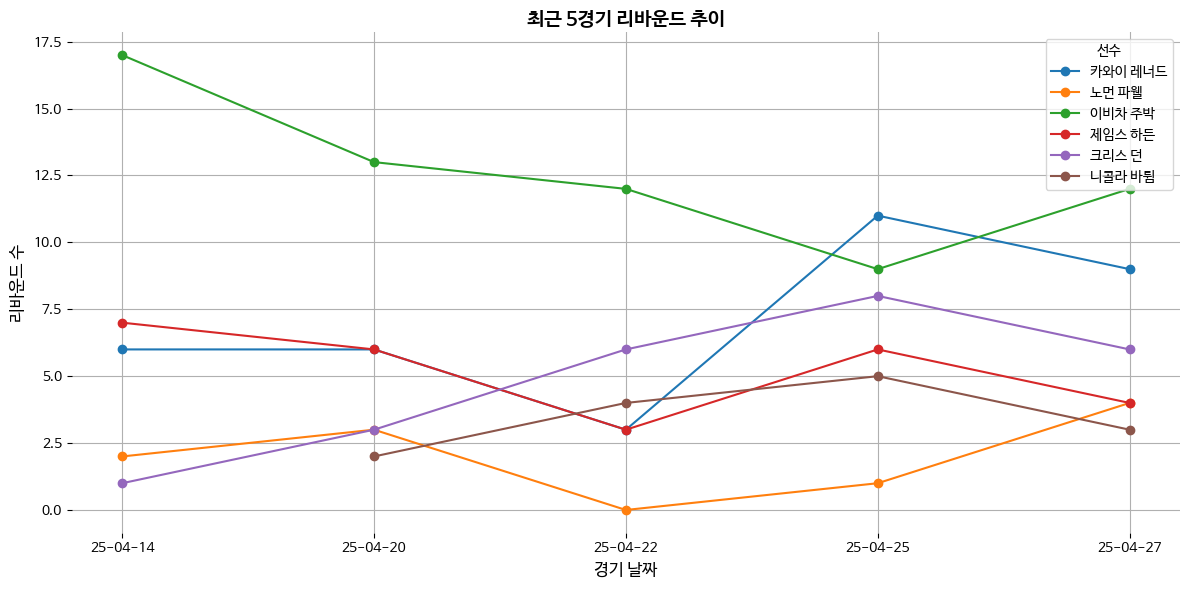

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df = pd.read_csv("/content/최근경기 요약.csv")

# 사용할 열
time_columns = ['리바운드1', '리바운드2', '리바운드3', '리바운드4', '리바운드5']
x_labels = ['25-04-14', '25-04-20', '25-04-22', '25-04-25', '25-04-27']

# 상위 6명 선수만 선택
selected_df = df[['선수명'] + time_columns].head(6)
selected_df['선수명'] = selected_df['선수명'].str.split('·').str[0].str.strip()

# 그래프 그리기
plt.figure(figsize=(12, 6))
for i, row in selected_df.iterrows():
    player_name = row['선수명']
    y_values = row[1:]
    plt.plot(x_labels, y_values, marker='o', label=player_name)


# 제목, 라벨 등
plt.title('최근 5경기 리바운드 추이', fontsize=14, fontweight='bold')
plt.xlabel('경기 날짜', fontsize=12)
plt.ylabel('리바운드 수', fontsize=12)

# 그래프 테두리 제거
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.legend(loc='upper right', title="선수", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


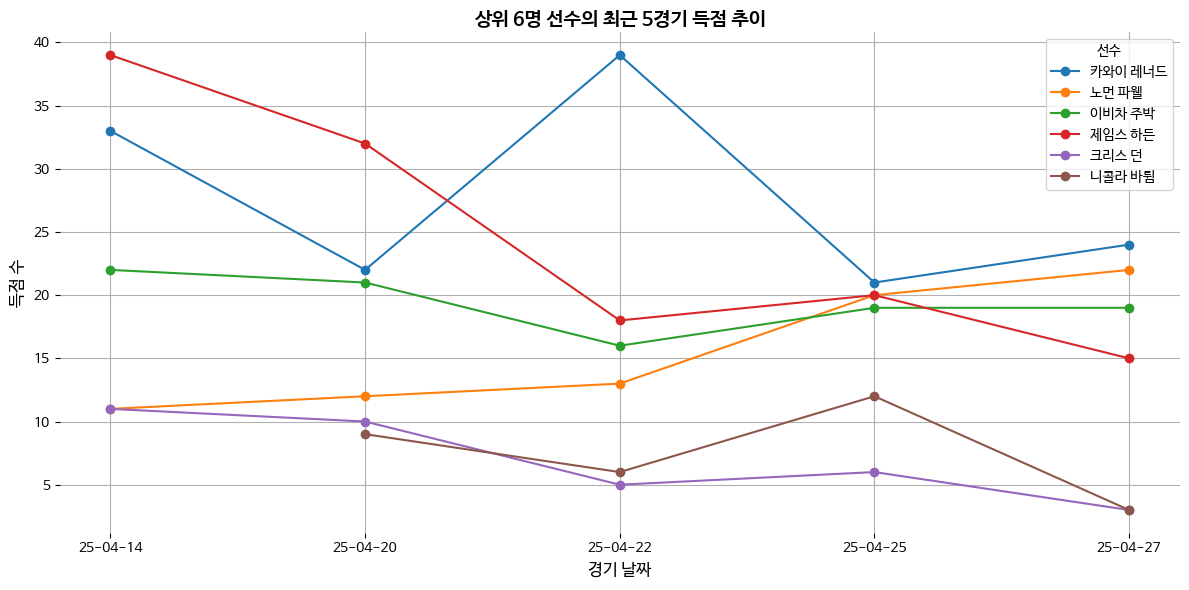

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 불러오기
df = pd.read_csv("/content/최근경기 요약.csv")

# 사용할 열
time_columns = ['득점1', '득점2', '득점3', '득점4', '득점5']
x_labels = ['25-04-14', '25-04-20', '25-04-22', '25-04-25', '25-04-27']

# 상위 6명 선수만 선택
selected_df = df[['선수명'] + time_columns].head(6)
selected_df['선수명'] = selected_df['선수명'].str.split('·').str[0].str.strip()

# 그래프 그리기
plt.figure(figsize=(12, 6))
for i, row in selected_df.iterrows():
    player_name = row['선수명']
    y_values = row[1:]
    plt.plot(x_labels, y_values, marker='o',label=player_name)


# 제목, 라벨 등
plt.title('상위 6명 선수의 최근 5경기 득점 추이', fontsize=14, fontweight='bold')
plt.xlabel('경기 날짜', fontsize=12)
plt.ylabel('득점 수', fontsize=12)

# 그래프 테두리 제거
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.legend(loc='upper right', title="선수", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


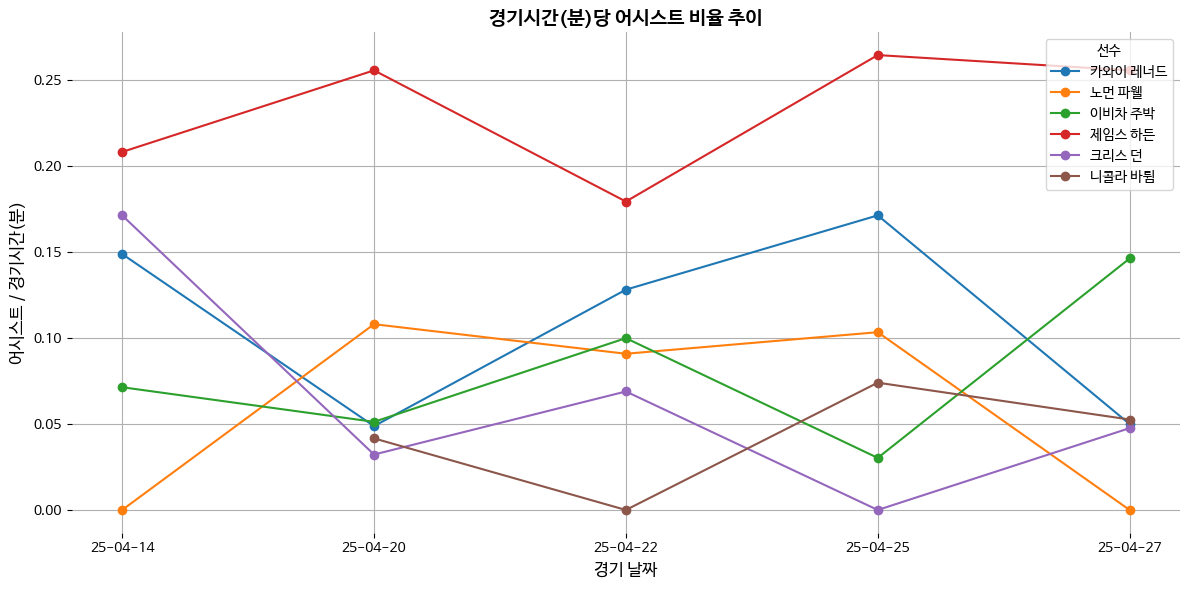

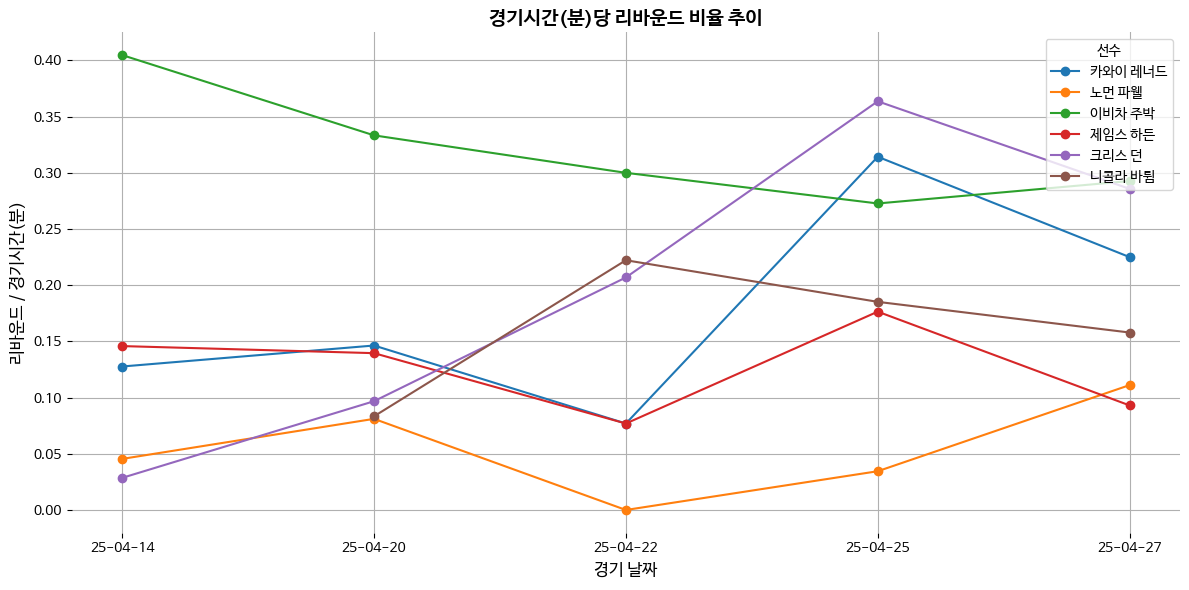

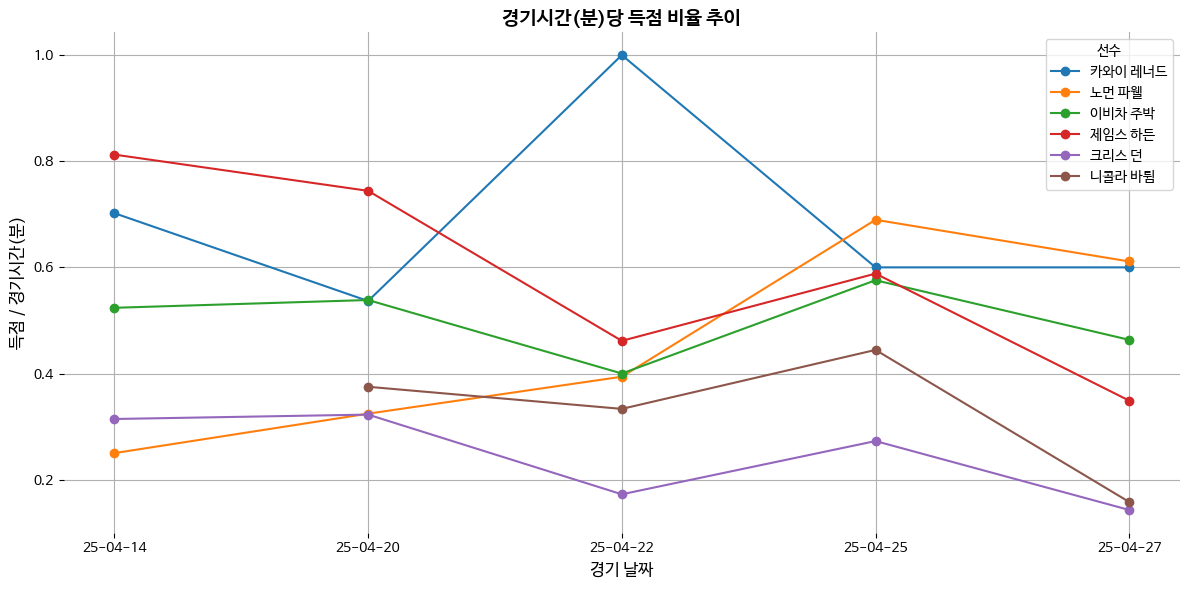

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv("/content/최근경기 요약.csv")

# 선수명에서 포지션 제거
df['선수명'] = df['선수명'].str.split('·').str[0].str.strip()

# 필요한 컬럼 세팅
time_cols = [f'경기시간(분){i}' for i in range(1, 6)]
metrics = ['어시스트', '리바운드', '득점']
x_labels = ['25-04-14', '25-04-20', '25-04-22', '25-04-25', '25-04-27']

# per-minute 컬럼 생성
for metric in metrics:
    for i in range(1, 6):
        df[f'{metric}_per_min{i}'] = df[f'{metric}{i}'] / df[f'경기시간(분){i}']

# 상위 6명 선택
selected_df = df[['선수명'] + [col for col in df.columns if 'per_min' in col]].head(6)

# 그래프 그리기
for metric in metrics:
    plt.figure(figsize=(12, 6))
    for idx, row in selected_df.iterrows():
        player_name = row['선수명']  # 🔸 범례에 사용할 이름 설정
        y_values = [row[f'{metric}_per_min{i}'] for i in range(1, 6)]
        plt.plot(x_labels, y_values, marker='o', label=player_name)

    # 그래프 설정
    plt.title(f'경기시간(분)당 {metric} 비율 추이', fontsize=14, fontweight='bold')
    plt.xlabel('경기 날짜', fontsize=12)
    plt.ylabel(f'{metric} / 경기시간(분)', fontsize=12)

    # 테두리 제거
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    # ✅ 범례 (오른쪽 상단)
    plt.legend(loc='upper right', title="선수", fontsize=10)

    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
그래프 해석
경기시간에서 리바운드와 어시스트 면에서 제임스 하든이 개인적인 득점은 적지만 리바운드와 어시스트를 통해 팀의 점수에 기여를 하고있으며
노먼 파웰의 득점률이 꾸준히 오르고 있음, 또한 카와이 레너드가 경기동안 큰 저점이 없이 기복없는 플레이를 보여주고 있음

SyntaxError: invalid syntax (<ipython-input-37-f23e6bd172ab>, line 1)